### Boxplots

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

In [3]:
# Generate some data from different distributions
Dist1 = np.random.normal(size = 5000)

# And one pareto distribution
Dist2 = np.random.pareto(a = 5, size = 5000)

# Concat 2 distributions
comp1 = np.random.normal(1, .2, size=5000)
comp2 = np.random.normal(2, .2, size=5000)
Dist3 = pd.Series(np.concatenate([comp1, comp2]))

Distributions = (Dist1, Dist2, Dist3)

{'whiskers': [<matplotlib.lines.Line2D at 0x20464387b10>,
 'caps': [<matplotlib.lines.Line2D at 0x204446a8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x204643aced0>,
 'medians': [<matplotlib.lines.Line2D at 0x204643c0f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x204643c1990>,
 'means': []}

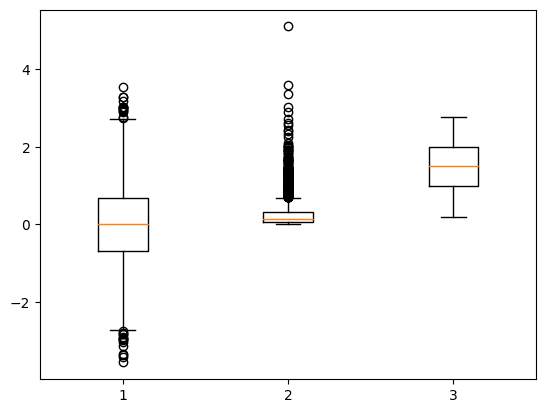

In [4]:
# Lets make a basic box plot of these data, using matplotlib's plt.boxplot to visualize
# some of those statistics

plt.boxplot(Distributions)



The box itself shows the interquartile range plus and minus 25% around the mean of your values.
The edges here show the 75th and 25th percentile. And finally, each of these little dots here, 
Show the outliers within the dataset

So, we can see with this simple plot above, we automatically see that these two first distributions have similar means,
but, a different standard deviation, and different inter-quartile range, and the 3rd variable has a different mean AND a different inter-quartile range



{'whiskers': [<matplotlib.lines.Line2D at 0x204644741d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20464475a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20464442550>,
 'medians': [<matplotlib.lines.Line2D at 0x20464477050>,
 'fliers': [<matplotlib.lines.Line2D at 0x20464477b50>,
 'means': []}

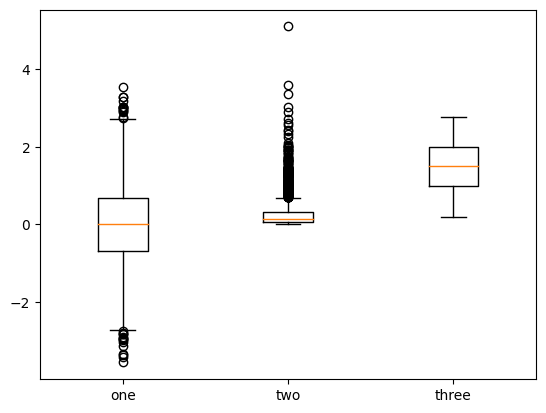

In [6]:
# Let's plot it again with some labels
plt.boxplot(Distributions, labels=("one", "two", "three"))

{'whiskers': [<matplotlib.lines.Line2D at 0x204644ea2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x204644eb6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204644e97d0>,
 'medians': [<matplotlib.lines.Line2D at 0x204644f8c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x204643ace50>,
 'means': []}

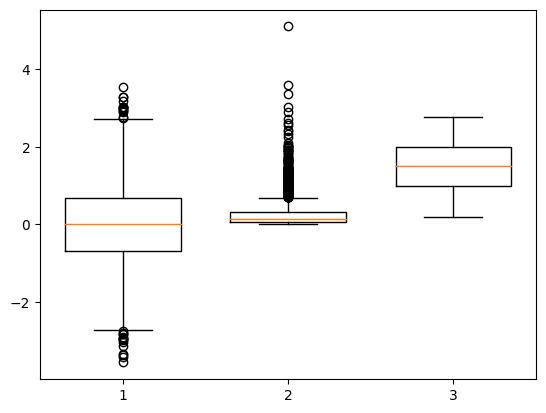

In [7]:
# Matplotlib automatically scales these for you, but you can change the width to make it smaller or larger if you like

plt.boxplot(Distributions, widths=0.7)

{'whiskers': [<matplotlib.lines.Line2D at 0x204665ba190>,
 'caps': [<matplotlib.lines.Line2D at 0x204665bb6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2046659a190>,
 'medians': [<matplotlib.lines.Line2D at 0x204665c0c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x204665c1710>,
 'means': []}

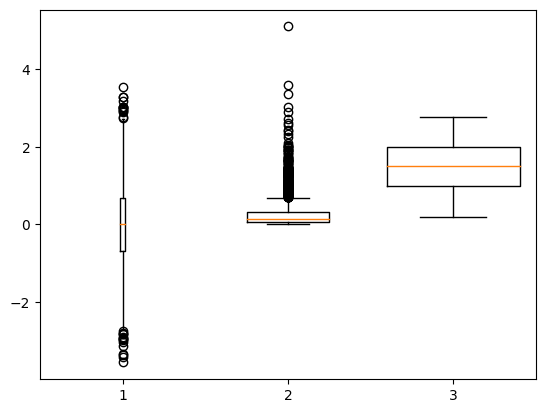

In [8]:
# Or you can adjust the width per variable by passing it as a tuple

plt.boxplot(Distributions, widths=(.03,.5,.8))

{'whiskers': [<matplotlib.lines.Line2D at 0x2046663f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20466650a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x204643c2550>,
 'medians': [<matplotlib.lines.Line2D at 0x20466652090>,
 'fliers': [<matplotlib.lines.Line2D at 0x20466606190>,
 'means': []}

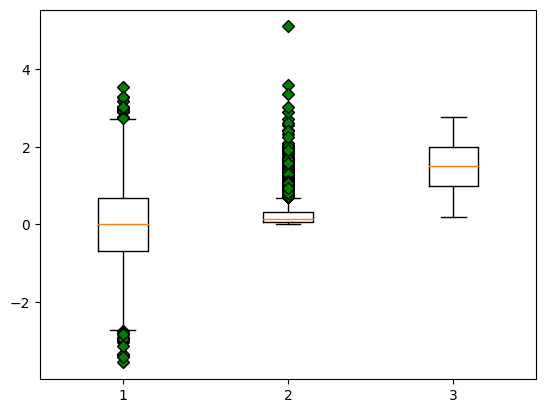

In [9]:
# Finally, you can customize the appearance of your outliers using the flierprops = feature.

green_diamond = dict(markerfacecolor='g', marker='D')

plt.boxplot(Distributions, flierprops=green_diamond)

### Violin

{'bodies': [<matplotlib.collections.PolyCollection at 0x2046454e350>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x20464533e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x20466872250>,
 'cbars': <matplotlib.collections.LineCollection at 0x20466873cd0>}

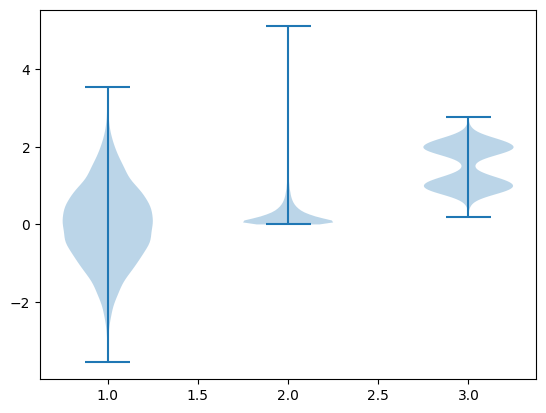

In [11]:
# However, there's some important information about the distribution that the box plot isn't revealing to us.

# We can visualize the data using a basic violin plot, uising matplotlib's plt.violinplots
plt.violinplot(Distributions)

We can see that variable 1 follows a normalish distribution, and variable 2 is a pareto distribution, and is incredibly unequal. This is used a lot in economics and shows the unequal distribution of wealth that we see in the real world. And variable 3 is a bimodial distribution, which you probably already realized this when we generated the data by concatenating 2 normal distributions. 

However, when we are dealing with real data we don't always walk into the data exploration process knowing the distribution of the data we're dealing with, which is the main reason we do exploratory analyses.

So, what is being done here is called a kernel density estimate, that actually shows each of these distributions as well as the range of values. This is a really great way of conveying differences in distirbution that you see in multiple different datasets. Matplotlib's violin plots use this kernel density estimation (KDE) to compute an empirical distribution of the sample.

we can also add extra annotations, like show means and medians, so if we set show mean to true, we add an extra line representing the mean. Similar to the median 

{'bodies': [<matplotlib.collections.PolyCollection at 0x204666d3a90>,
 'cmeans': <matplotlib.collections.LineCollection at 0x204666bf050>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x20466693dd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x204665dbb90>,
 'cbars': <matplotlib.collections.LineCollection at 0x20466690ed0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x204666aec10>}

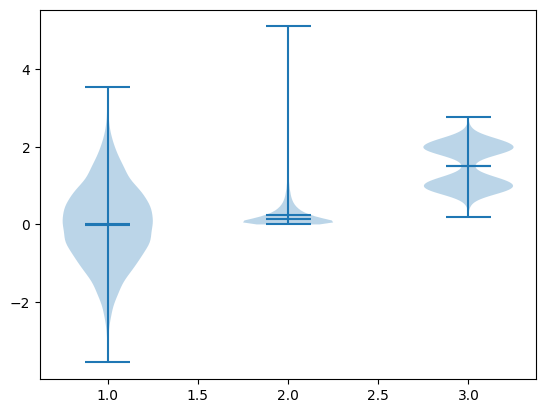

In [13]:
# Add some extra annotation
plt.violinplot(Distributions, showmeans=True, showmedians=True)

{'bodies': [<matplotlib.collections.PolyCollection object at 0x0000020469FB5F50>, <matplotlib.collections.PolyCollection object at 0x0000020469FB7050>, <matplotlib.collections.PolyCollection object at 0x0000020469F80290>], 'cmeans': <matplotlib.collections.LineCollection object at 0x0000020469E8EE50>, 'cmaxes': <matplotlib.collections.LineCollection object at 0x0000020469FB6990>, 'cmins': <matplotlib.collections.LineCollection object at 0x0000020469F84B50>, 'cbars': <matplotlib.collections.LineCollection object at 0x000002046A10E990>, 'cmedians': <matplotlib.collections.LineCollection object at 0x0000020469FB7AD0>}
dict_keys(['bodies', 'cmeans', 'cmaxes', 'cmins', 'cbars', 'cmedians'])


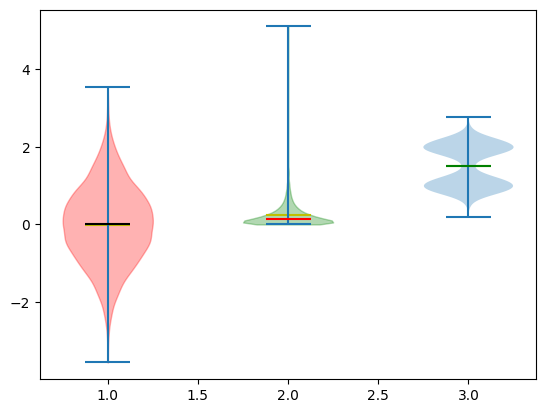

In [16]:
# If we want to actually customize the appearance of the violin plots we have to do someting a bit different. 

violin_plot = plt.violinplot(Distributions, showmeans=True, showmedians=True)

# If we print the violinplot what do we get? 
print(violin_plot)

# You can see that we get a dictionary, which has some keys among other things. Lets print the keys.
print(violin_plot.keys())

# Now let's try to change the color of the means, so we can see the difference in the mean and median lines.

violin_plot['cmeans'].set_color('y')

# We can also change the color of the bodies themselves, but if we try this in  a similar fashion, we get an error,
# that's because this bodies, unlike the other elements, is actually a list object. So we have to go and access each individual by indexing it

violin_plot['bodies'][0].set_color('r')
violin_plot['bodies'][1].set_color('g')


# if you wanted to change each of the line colors for means or medians, we would have to do something different,
# and an unfortunate parts of the violin plot is that it requires slightly different syntax for each of the components, and so we instead would want
# to pass this a list or tupal for each line like so

violin_plot['cmedians'].set_color(('k','r','g'))

